In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c',
             '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
             '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'

In [2]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
n_features =6
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"retina_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/retina_xor_multi_arch/{res_folder}"

In [4]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-10-24-10-00-54_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"

In [5]:
lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [6]:
corrlated_features_values = pd.read_csv(
    f"{results_path}/{res_folder}/feature_correlation/2023-11-28-16-07-16_all_data.csv")
correlated_features_csv_name = "2023-11-28-13-17-26_feature_correlation.csv"
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/noamaz/modularity/retina_xor//retina_3_layers/feature_correlation/2023-11-28-16-07-16_all_data.csv'

In [ ]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis.shape

In [ ]:
x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=blues[1], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=blues[2], label='mean over density')
plt.legend()
plt.ylabel("Network's mean performance", fontsize=16)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png")
plt.show()

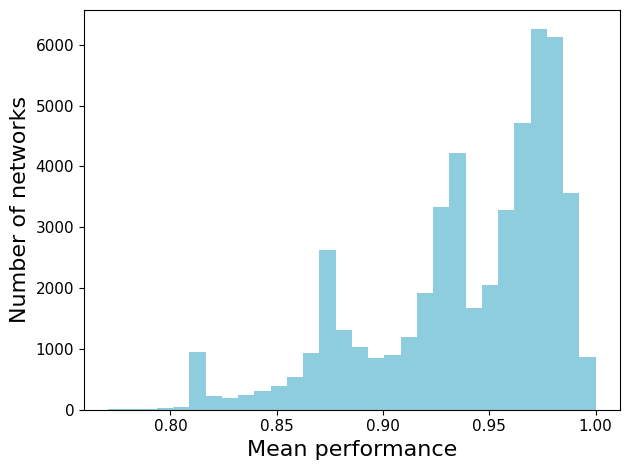

In [9]:
plt.hist(first_analsis['mean_performance'], color=blues[1], bins=30)
plt.xlabel('Mean performance', fontsize=16)
plt.ylabel('Number of networks', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.title(f"{task.capitalize()}", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [10]:
neurons_feature_names = [f'neurons_in_layer_{i}' for i in range(1, int(num_layers))]
dims = [f"{i}_{j}" for i, j, in first_analsis[neurons_feature_names].values.tolist()]
dims.sort()
dims_to_num = {
    dim: i + 1
    for i, dim in enumerate(set(dims))
}
first_analsis['dims'] = dims

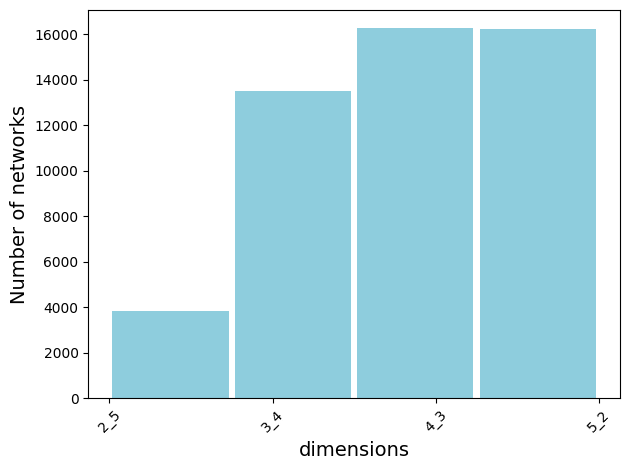

In [11]:
plt.hist(first_analsis['dims'], color=blues[1], bins=len(set(dims)), align='mid', rwidth=0.95)
plt.xticks(rotation=45)
plt.xlabel('dimensions', fontsize=14)
plt.ylabel('Number of networks', fontsize=14)
#axs[k].set_xlabel(f_name,  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_dims_hist.png")
plt.show()

In [28]:
orignaly_chosen_features_values = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0",
                                                                                                      axis=1)
originaly_selected_feature_names = list(orignaly_chosen_features_values.columns)[:-1]

corrlated_selected_feature_names = [
    correlated_features[feature].drop(index=feature).idxmax()
    for feature in originaly_selected_feature_names
]

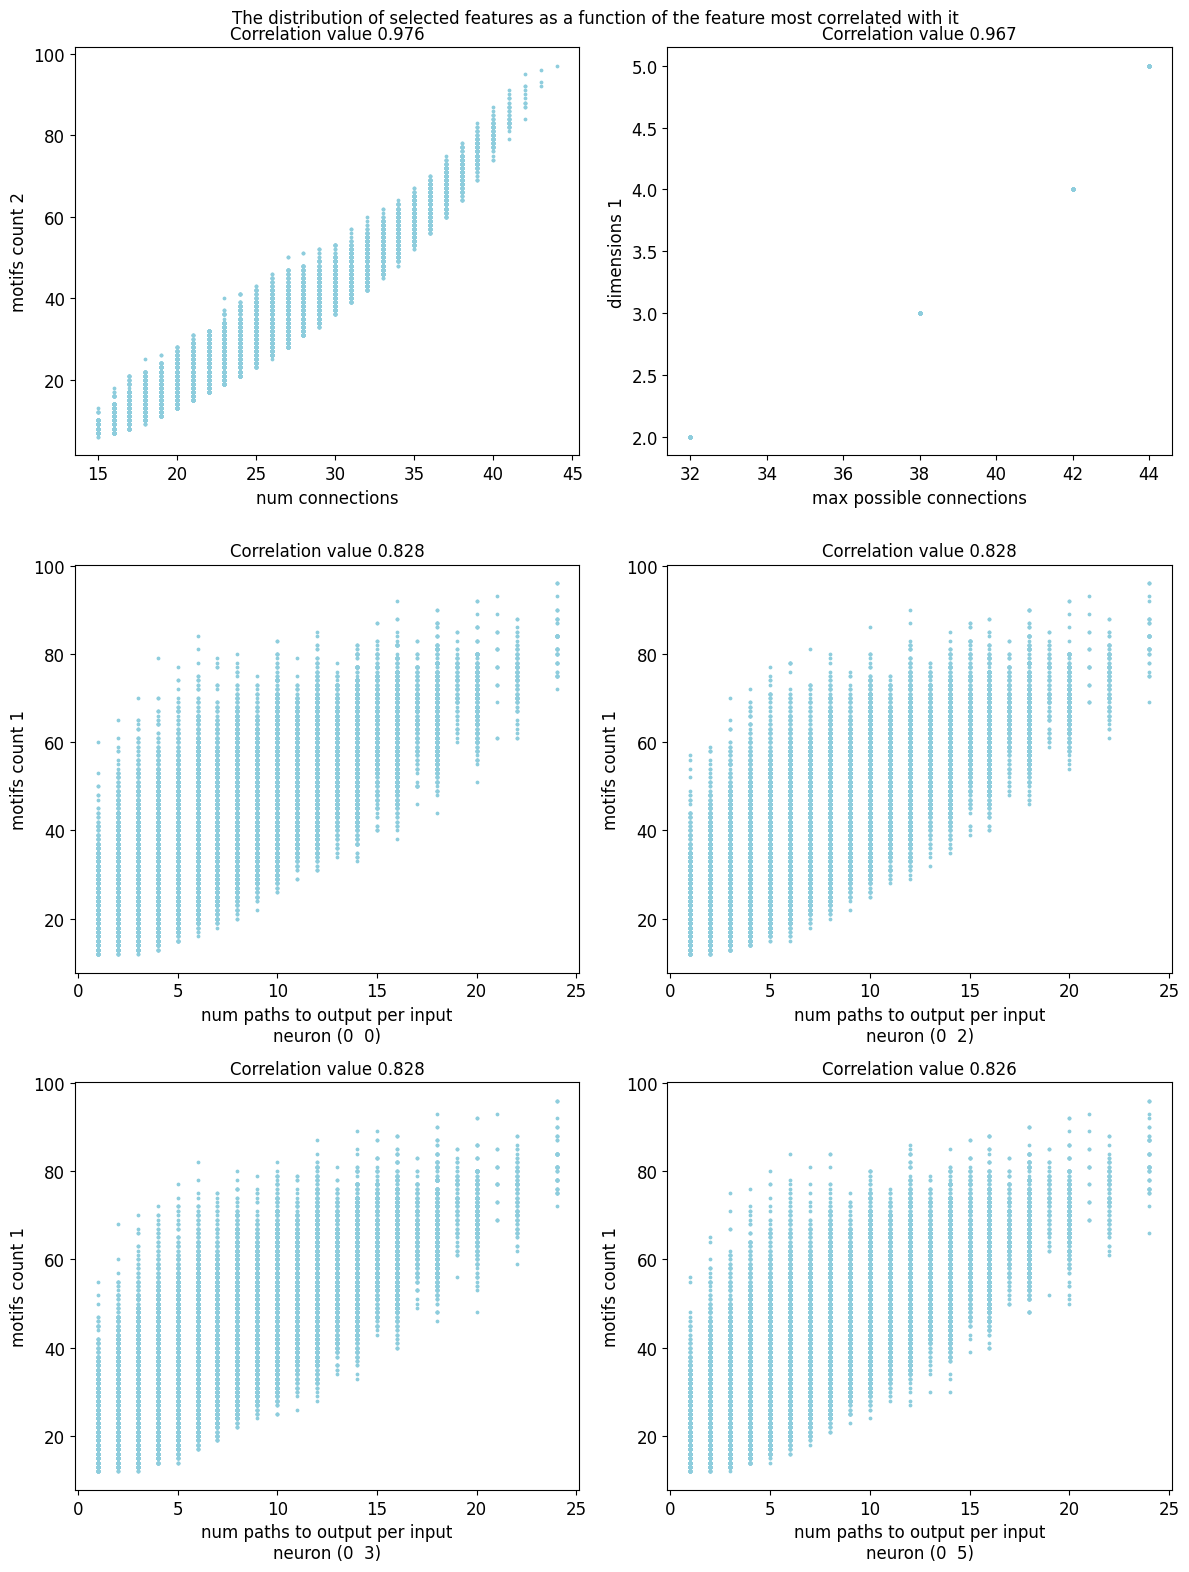

In [29]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    axs[i, j].scatter(corrlated_features_values[origin_f_name], corrlated_features_values[coor_f_name],
                      color=blues[1], s=3)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(f"The distribution of selected features as a function of the feature most correlated with it")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_correlated_features_dist.png")


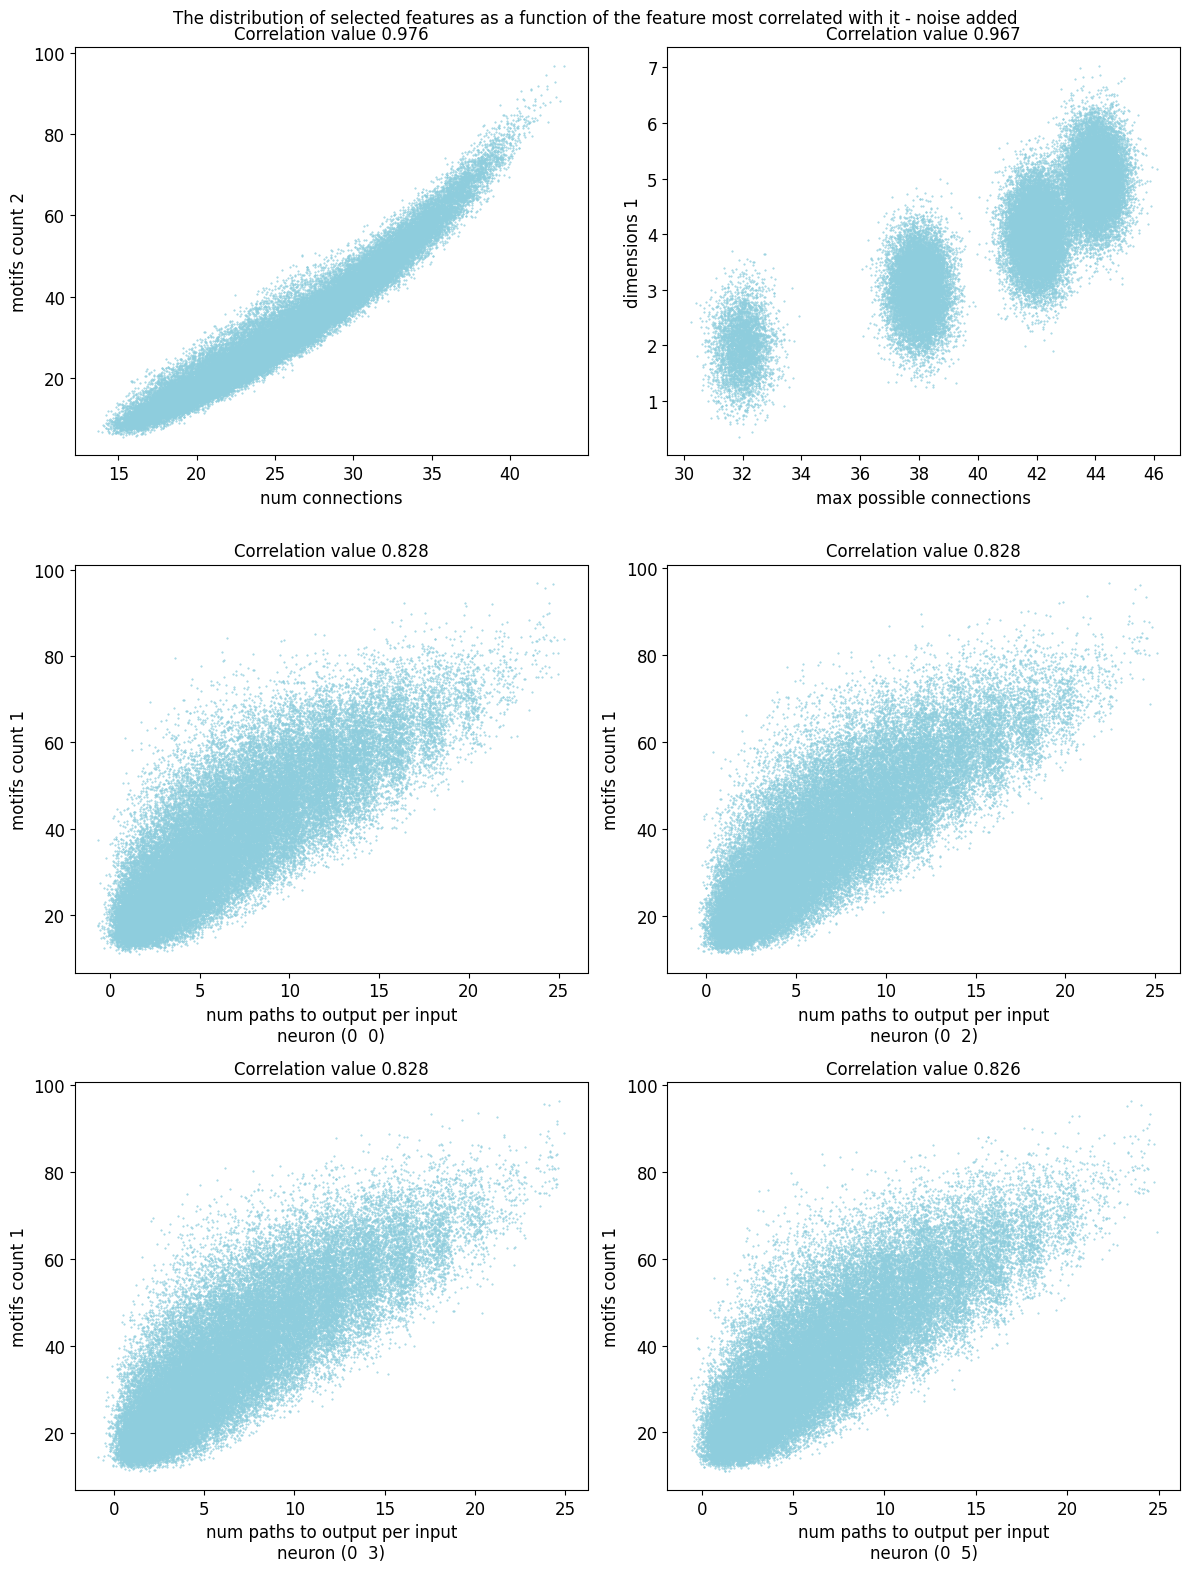

In [30]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    x_data = corrlated_features_values[origin_f_name]
    y_data = corrlated_features_values[coor_f_name]
    axs[i, j].scatter(x_data + np.random.normal(scale=0.5, size=x_data.shape[0]),
                      y_data + np.random.normal(scale=0.5, size=y_data.shape[0]),
                      color=blues[1], s=0.2)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(
    f"The distribution of selected features as a function of the feature most correlated with it - noise added")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_noise_correlated_features_dist.png")


In [31]:
correlated_features

,connectivity_ratio,num_connections,max_possible_connections,out_connections_per_layer_(0_ 0),out_connections_per_layer_(0_ 1),out_connections_per_layer_(0_ 2),out_connections_per_layer_(0_ 3),out_connections_per_layer_(0_ 4),out_connections_per_layer_(0_ 5),out_connections_per_layer_(1_ 0),...,num_paths_to_output_per_input_neuron_(0_ 1),num_paths_to_output_per_input_neuron_(0_ 2),num_paths_to_output_per_input_neuron_(0_ 3),num_paths_to_output_per_input_neuron_(0_ 4),num_paths_to_output_per_input_neuron_(0_ 5),motifs_count_0,motifs_count_1,motifs_count_2,dimensions_1,dimensions_2
connectivity_ratio,1.000000,0.915320,0.144506,0.504560,0.498582,0.505195,0.500187,0.499406,0.502110,0.466814,...,0.794818,0.796634,0.797475,0.796370,0.796156,0.866712,0.942618,0.916886,0.135956,0.135956
num_connections,0.915320,1.000000,0.259279,0.656808,0.653616,0.659081,0.654774,0.653080,0.656138,0.226741,...,0.761030,0.761547,0.762356,0.759551,0.760145,0.969541,0.901210,0.975508,0.251028,0.251028
max_possible_connections,0.144506,0.259279,1.000000,0.393333,0.400127,0.397618,0.398903,0.397481,0.398122,0.544126,...,0.025395,0.028208,0.028146,0.031731,0.030176,0.290018,0.032294,0.189821,0.967454,0.967454
out_connections_per_layer_(0_ 0),0.504560,0.656808,0.393333,1.000000,0.447406,0.446433,0.444681,0.441539,0.441462,0.061755,...,0.339510,0.337208,0.338497,0.335289,0.333662,0.678702,0.471454,0.654151,0.404301,0.404301
out_connections_per_layer_(0_ 1),0.498582,0.653616,0.400127,0.447406,1.000000,0.443130,0.445128,0.441961,0.442035,0.067933,...,0.693899,0.331893,0.336474,0.329807,0.331956,0.674288,0.465615,0.649922,0.411593,0.411593
out_connections_per_layer_(0_ 2),0.505195,0.659081,0.397618,0.446433,0.443130,1.000000,0.451780,0.444981,0.448505,0.064619,...,0.337693,0.694966,0.342623,0.336148,0.337644,0.679998,0.471498,0.656192,0.408023,0.408023
out_connections_per_layer_(0_ 3),0.500187,0.654774,0.398903,0.444681,0.445128,0.451780,1.000000,0.444385,0.446923,0.070943,...,0.335277,0.335276,0.691626,0.331280,0.331349,0.678254,0.464906,0.652123,0.410951,0.410951
out_connections_per_layer_(0_ 4),0.499406,0.653080,0.397481,0.441539,0.441961,0.444981,0.444385,1.000000,0.448029,0.069252,...,0.332850,0.332418,0.332801,0.690403,0.333309,0.675217,0.464245,0.650660,0.408529,0.408529
out_connections_per_layer_(0_ 5),0.502110,0.656138,0.398122,0.441462,0.442035,0.448505,0.446923,0.448029,1.000000,0.065654,...,0.335041,0.335800,0.335198,0.334769,0.692882,0.677042,0.468092,0.653589,0.408344,0.408344
out_connections_per_layer_(1_ 0),0.466814,0.226741,0.544126,0.061755,0.067933,0.064619,0.070943,0.069252,0.065654,1.000000,...,0.368218,0.368462,0.367539,0.370734,0.368995,0.167490,0.484317,0.222825,0.542887,0.542887


In [32]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]
all_ticks = []
for feature_full_name in correlated_features.columns:
    for feature_general_name in NICE_FEATURES:
        if feature_general_name == 'connectivity_ratio' and feature_general_name != feature_full_name:
            continue
        if feature_general_name in feature_full_name:
            all_ticks.append(feature_general_name)
labels = []
for name in all_ticks:
    if name not in labels:
        labels.append(name)
texts = []
colors_ = []
for i, tick in enumerate(labels):
    temp = [i for i, val in enumerate(all_ticks) if val == tick]
    tick = tick.replace('connectivity_ratio', 'density').replace('_', ' ')
    if len(temp) == 1:
        texts.append(f"{temp[0]}: {tick}")
    else:
        texts.append(f"{temp[0]} - {temp[-1]}: {tick}")
    for j in range(temp[-1] - temp[0] + 1):
        colors_.append(COLORS_20[i])

<Figure size 7800x7200 with 0 Axes>

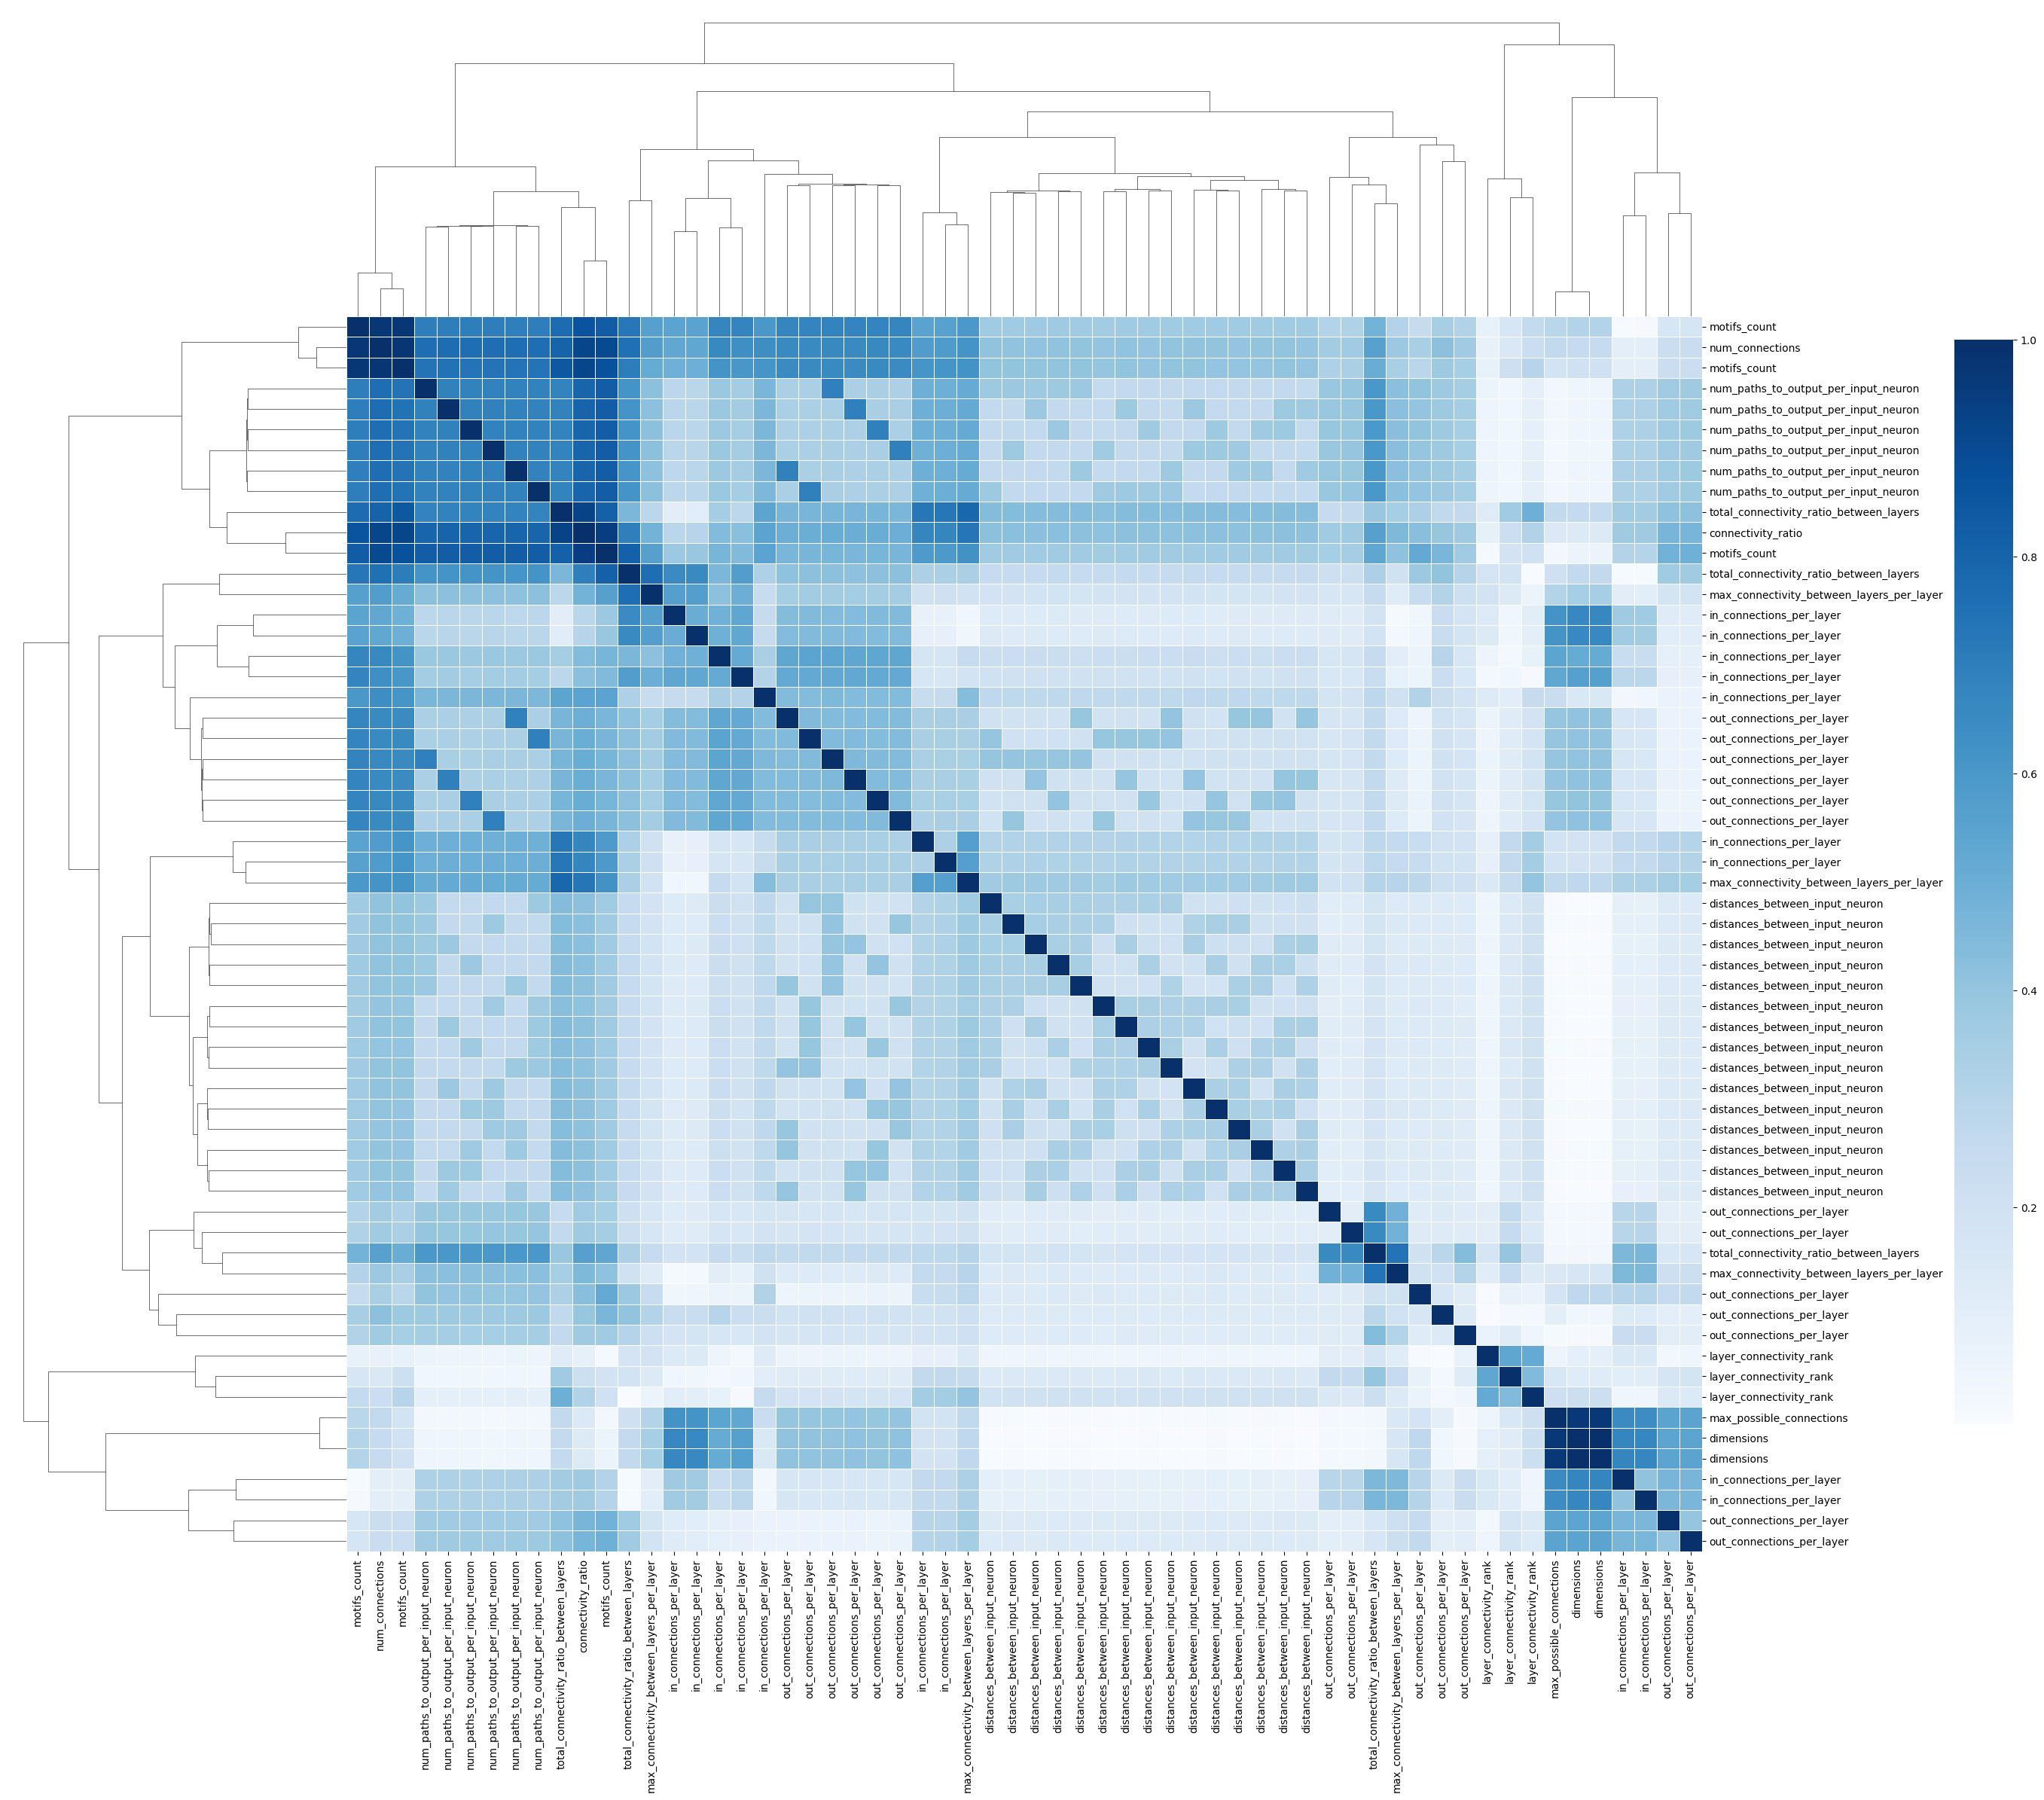

In [34]:
col = 'Blues'
plt.figure(figsize=(26,24), dpi = 300)
c = sns.color_palette(col, as_cmap=True)
correlated_features_new_name = correlated_features.copy()
correlated_features_new_name.columns = all_ticks
correlated_features_new_name.index = all_ticks
s =sns.clustermap(correlated_features_new_name, linewidth=0.5, cmap=c,cbar_pos=(1,0.21,0.03,0.6,),figsize=(26,24))
s.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation_with_clustering.png")
plt.show()

In [8]:
from scipy.stats import pearsonr
for col in ['density' , 'motifs_count_0', 'motifs_count_1', 'motifs_count_2', 'max_possible_connections' ,'num_connections']:
    print(col, round(abs(pearsonr(first_analsis[col],first_analsis['mean_performance']).statistic), 3))

density 0.655
motifs_count_0 0.66
motifs_count_1 0.685
motifs_count_2 0.673
max_possible_connections 0.264
num_connections 0.734
